In [15]:
# Importando frameworks e bibliotecas
import pandas as pd
from datetime import datetime

# Padronizando exibição do float sem decimais
pd.options.display.float_format = '{:,.0f}'.format

In [16]:
# Carregando os datasets no Pandas
ceis = pd.read_csv("Datasets/CEIS.csv", sep=";", engine="python", encoding="ISO-8859-1", error_bad_lines=False)
estados = pd.read_csv("Datasets/IBGE_Estados.csv", sep=";", engine="python", encoding="ISO-8859-1", error_bad_lines=False)

C:\Users\andre\AppData\Local\Temp\ipykernel_20384\2268965269.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ceis = pd.read_csv("Datasets/CEIS.csv", sep=";", engine="python", encoding="ISO-8859-1", error_bad_lines=False)
C:\Users\andre\AppData\Local\Temp\ipykernel_20384\2268965269.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  estados = pd.read_csv("Datasets/IBGE_Estados.csv", sep=";", engine="python", encoding="ISO-8859-1", error_bad_lines=False)


In [17]:
# Transformando colunas de data em formato datetime
ceis['DATA INICIO SANCAO'] = pd.to_datetime(ceis['DATA INICIO SANCAO'])
ceis['DATA FINAL SANCAO'] = pd.to_datetime(ceis['DATA FINAL SANCAO'])
ceis['DATA ORIGEM INFORMACOES'] = pd.to_datetime(ceis['DATA ORIGEM INFORMACOES'])
ceis['DATA PUBLICACAO'] = pd.to_datetime(ceis['DATA PUBLICACAO'])
ceis['DATA DO TRANSITO EM JULGADO'] = pd.to_datetime(ceis['DATA DO TRANSITO EM JULGADO'])

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/02/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/11/2004' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/02/2022' in DD/MM/YYYY format. Provide format o

### Quantitativo de empresas inidôneas e suspeitas por Estado

<AxesSubplot:>

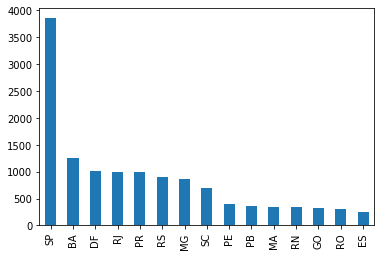

In [18]:
# Criando o gráfico sumarizador por Estado
ceis['UF ORGAO SANCIONADOR'].value_counts()[:15].plot(kind='bar')

### Duração média de sanções executadas por Estado

,media,min,max
UF ORGAO SANCIONADOR,,,
AC,"1,754",273,5207
AL,"2,282",299,5226
AM,"2,497",365,5530
AP,"2,356",994,3653
BA,"2,219",6,11111
CE,"1,614",2,3776
DF,"1,583",1,11894
ES,"1,905",3,4815
GO,"2,124",364,9497


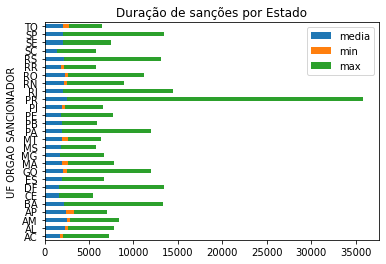

In [19]:
# Colocando a data atual no fim da sanção
ceis.loc[ceis['DATA FINAL SANCAO'].isnull(), 'DATA FINAL SANCAO'] = datetime.today()

# Criando delta, convertendo para inteiro e limpando possíveis valores errados
ceis['DURACAO SANCAO'] = (ceis['DATA FINAL SANCAO'] - ceis['DATA INICIO SANCAO']).dt.days
ceis['DURACAO SANCAO'] = ceis['DURACAO SANCAO'].astype('Int64')
ceis = ceis[ceis['DURACAO SANCAO'] >= 0]

# Gerando Dataset com média, min e max de cada Estado e criando o gráfico
media_regiao = pd.DataFrame(columns=['media', 'min', 'max'])
media_regiao['media'] = ceis.groupby('UF ORGAO SANCIONADOR').agg({'DURACAO SANCAO': ['mean']})
media_regiao['min'] = ceis.groupby('UF ORGAO SANCIONADOR').agg({'DURACAO SANCAO': ['min']})
media_regiao['max'] = ceis.groupby('UF ORGAO SANCIONADOR').agg({'DURACAO SANCAO': ['max']})
media_regiao.plot(title='Duração de sanções por Estado', kind='barh', ylabel='Dias', stacked=True)
media_regiao

#media_regiao.head(30)
#media_regiao['media'] = media_regiao['media'].astype('Int64')
#ceis[['DATA INICIO SANCAO', 'DATA FINAL SANCAO', 'DURACAO SANCAO']].head(50)
#ufs = ceis['UF ORGAO SANCIONADOR'].unique().tolist()
